# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

**Keterangan Dataset** <br>
Dataset yang digunakan bersumber dari Kaggle terkait Pengelompokan Minat Remaja yang ditinjau dari Sosial Media menggunakan Teknik Text Mining. Terdapat file CSV yang memiliki keterangan terkait remaja yang diperoleh dari sosial media mereka dengan jumlah observasi total adalah 15000 serta diperoleh pada tahun 2006 - 2009. 

*Variabel Kategorikal* : Gender (Female, Male)
*Variabel Numerik* : 
- **gradyear**: The graduation year of the high school student.
- **age**: The age of the student at the time of the survey.
- **NumberOffriends**: The number of contacts or friends the student had on the social network.
- **basketball**: The frequency or count of mentions of basketball in the student's profile.
- **football**: The frequency or count of mentions of football in the student's profile.
- **soccer**: The frequency or count of mentions of soccer in the student's profile.
- **softball**: The frequency or count of mentions of softball in the student's profile.
- **volleyball**: The frequency or count of mentions of volleyball in the student's profile.
- **swimming**: The frequency or count of mentions of swimming in the student's profile.
- **cheerleading**: The frequency or count of mentions of cheerleading in the student's profile.
- **baseball**: The frequency or count of mentions of baseball in the student's profile.
- **tennis**: The frequency or count of mentions of tennis in the student's profile.
- **sports**: The overall frequency or count of mentions of sports in the student's profile.
- **cute**: The frequency or count of mentions of cute in the student's profile.
- **sex**: The frequency or count of mentions of sex in the student's profile.
- **sexy**: The frequency or count of mentions of sexy in the student's profile.
- **hot**: The frequency or count of mentions of hot in the student's profile.
- **kissed**: The frequency or count of mentions of kissed in the student's profile.
- **dance**: The frequency or count of mentions of dance in the student's profile.
- **band**: The frequency or count of mentions of band in the student's profile.
- **marching**: The frequency or count of mentions of marching in the student's profile.
- **music**: The frequency or count of mentions of music in the student's profile.
- **rock**: The frequency or count of mentions of rock in the student's profile.
- **god**: The frequency or count of mentions of god in the student's profile.
- **church**: The frequency or count of mentions of church in the student's profile.
- **jesus**: The frequency or count of mentions of Jesus in the student's profile.
- **bible**: The frequency or count of mentions of the Bible in the student's profile.
- **hair**: The frequency or count of mentions of hair in the student's profile.
- **dress**: The frequency or count of mentions of dress in the student's profile.
- **blonde**: The frequency or count of mentions of blonde in the student's profile.
- **mall**: The frequency or count of mentions of mall in the student's profile.
- **shopping**: The frequency or count of mentions of shopping in the student's profile.
- **clothes**: The frequency or count of mentions of clothes in the student's profile.
- **hollister**: The frequency or count of mentions of Hollister (a brand) in the student's profile.
- **abercrombie**: The frequency or count of mentions of Abercrombie (a brand) in the student's profile.
- **die**: The frequency or count of mentions of die in the student's profile.
- **death**: The frequency or count of mentions of death in the student's profile.
- **drunk**: The frequency or count of mentions of drunk in the student's profile.
- **drugs**: The frequency or count of mentions of drugs in the student's profile.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

# Outlier Detection
from sklearn.ensemble import IsolationForest

# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn_extra.cluster import CLARA, KMedoids
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
from yellowbrick.cluster import KElbowVisualizer

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Clustering Evaluation
from sklearn.metrics import silhouette_score

# Feature Selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Hyperparameter Tuning
import optuna

# Utilities
from tabulate import tabulate

/home/anugerahsurya/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
data = pd.read_csv("Dataset_Clustering.csv")  # Gunakan 'sep' yang sesuai jika perlu

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### 1. Memahami Struktur Data dan Pengecekan Missing Value

In [3]:
text1 = "1. Memahami Struktur Data dan Pengecekan Missing Value"
formatted_text = text1.center(100, "=")  # Panjang total string 100 dengan padding "="
print(formatted_text,"\n")

def cek_missing_value(df):
    missing_values = df.isnull().sum()
    percent_missing = (missing_values / len(df)) * 100
    print("Jumlah Missing Value : ")

print(cek_missing_value(data))


=======================1. Memahami Struktur Data dan Pengecekan Missing Value======================= 

Jumlah Missing Value : 
None


### 2. Analisis Distribusi dan Korelasi

In [4]:
text2 = "2. Analisis Distribusi dan Korelasi"
formatted_text = text2.center(100, "=")
print(formatted_text,"\n")
distribution = data.describe(include='all')
print("Distribusi seluruh kolom:")
display(distribution)

================================2. Analisis Distribusi dan Korelasi================================= 

Distribusi seluruh kolom:


,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,15000.000000,13663,12504,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
unique,NaN,2,1906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,F,16. Jun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,11057,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2007.496933,NaN,NaN,29.834533,0.267000,0.255467,0.22200,0.159667,0.142933,0.135000,...,0.112867,0.259467,0.357267,0.150267,0.071800,0.051467,0.185867,0.118067,0.091733,0.061067
std,1.116516,NaN,NaN,35.386649,0.788851,0.702260,0.92042,0.737344,0.638747,0.548691,...,2.708619,0.704398,0.728512,0.478716,0.356258,0.280755,0.609928,0.455200,0.420631,0.349112
min,2006.000000,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,NaN,NaN,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,NaN,NaN,20.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,NaN,NaN,44.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 3. Visualisasi Data


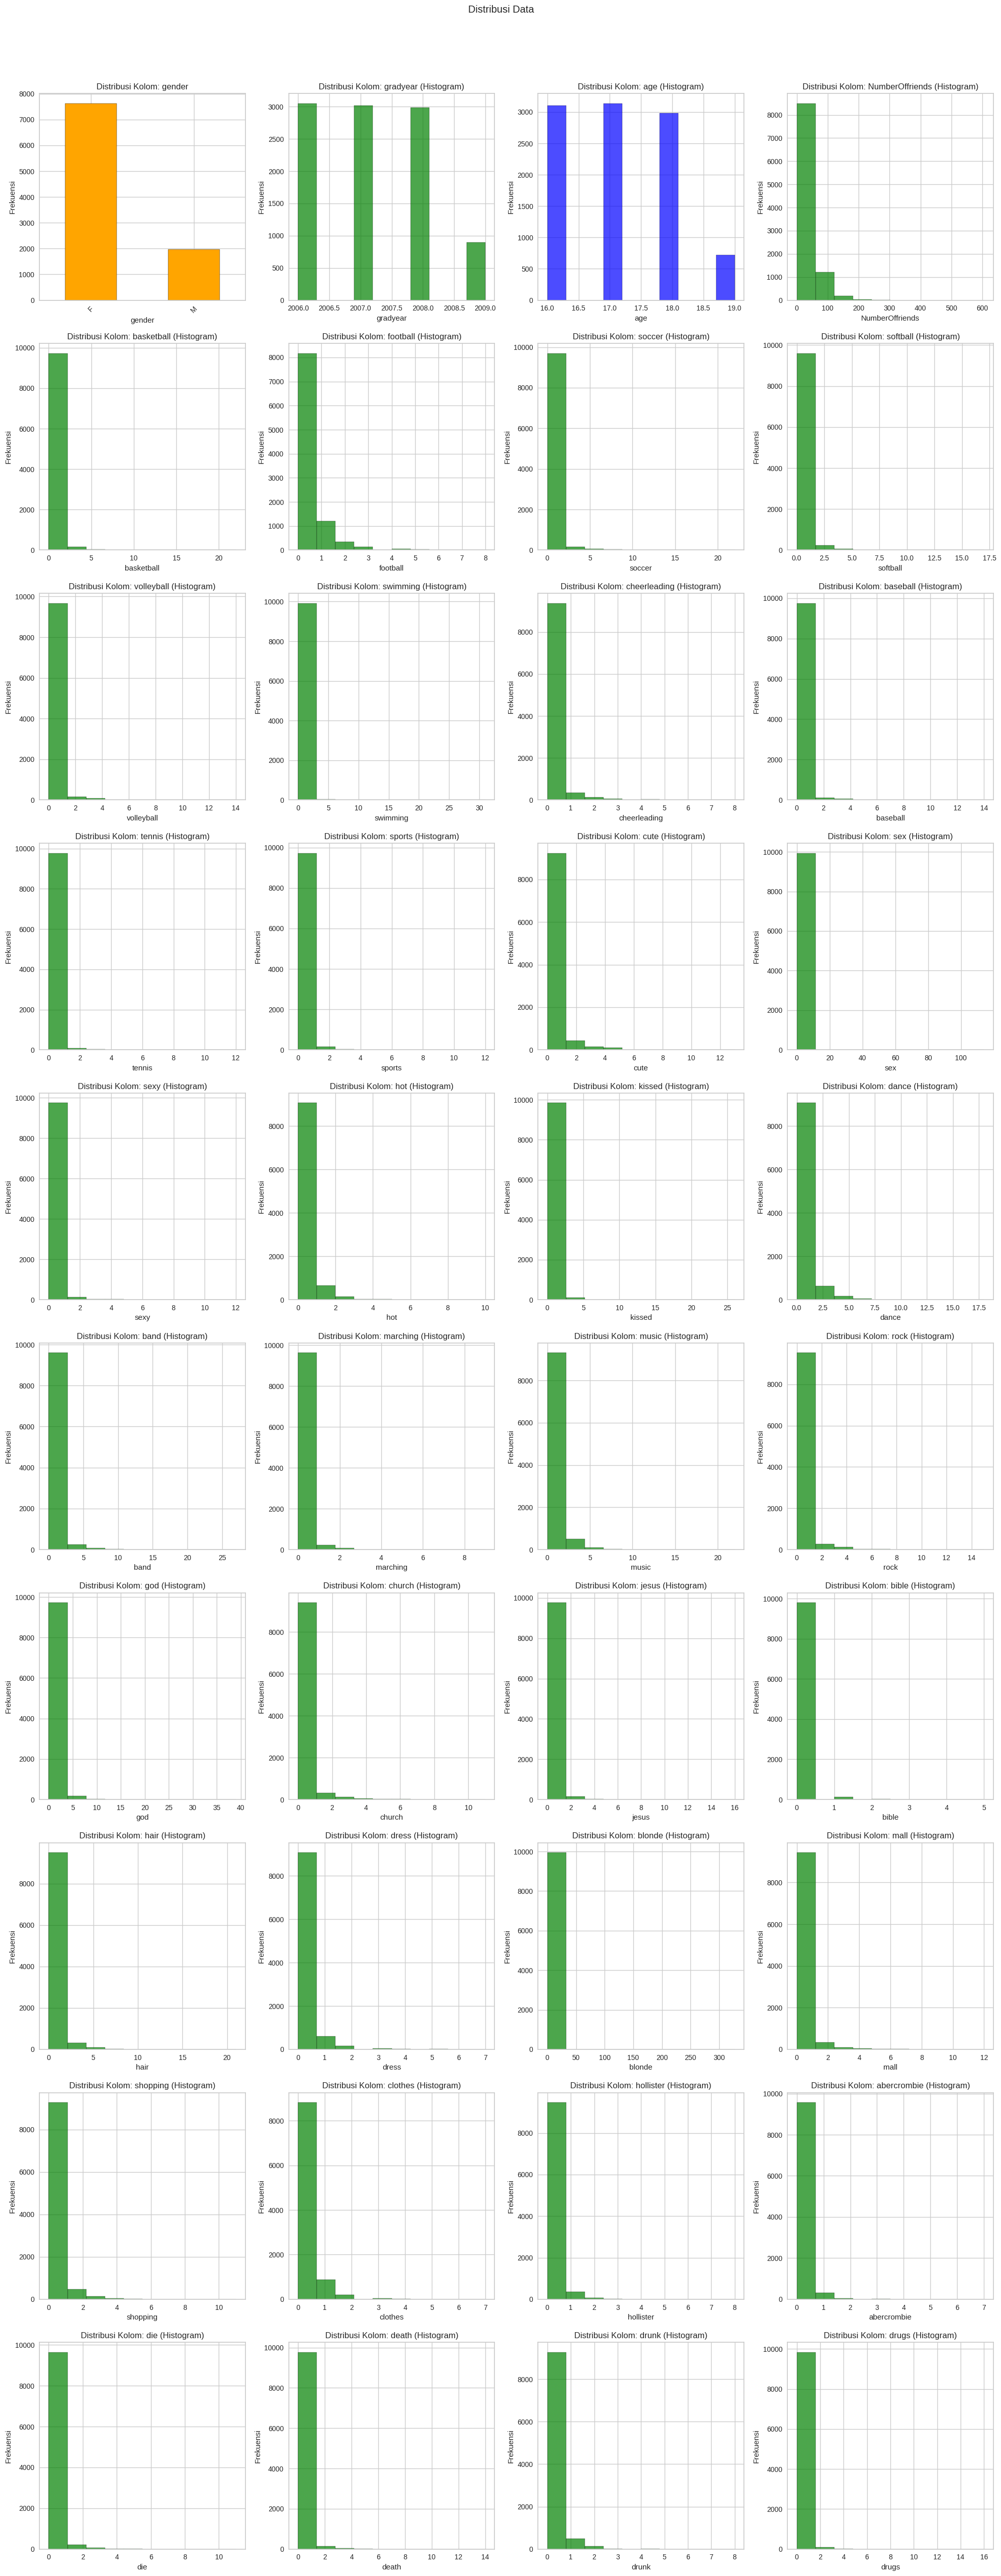

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def visualisasi_data(data, max_categories=10):
    if data.empty:
        print("Dataset kosong! Tidak ada data untuk divisualisasikan.")
        return
    
    # Identifikasi tipe data
    categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
    numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
    
    # Pastikan 'age' ada sebelum mengaksesnya
    if 'age' in data.columns:
        data['age'] = pd.to_numeric(data['age'], errors='coerce')  # Konversi ke numerik
        data = data[(data['age'] >= 16) & (data['age'] <= 20)]  # Filter rentang umur
        data = data.dropna(subset=['age'])  # Hapus NaN setelah konversi
        data['age'] = data['age'].astype(int)
    
    # Jika semua data hilang setelah filter, hentikan eksekusi
    if data.empty:
        print("Dataset kosong setelah filtering! Tidak ada data untuk divisualisasikan.")
        return

    num_cols = len(categorical_columns) + len(numerical_columns)
    if num_cols == 0:
        print("Tidak ada kolom yang dapat divisualisasikan.")
        return

    cols_per_row = 4  # Ubah jumlah kolom per baris menjadi 4
    rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)
    fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(20, 5 * rows))
    axes = axes.flatten()

    i = 0  # Counter untuk subplot
    
    # Visualisasi kolom kategorikal
    for col in categorical_columns:
        value_counts = data[col].value_counts()
        
        top_values = value_counts[:max_categories] if len(value_counts) > max_categories else value_counts
        top_values.plot(kind='bar', ax=axes[i], color='orange', edgecolor='black')
        axes[i].set_title(f"Distribusi Kolom: {col}")
        axes[i].set_ylabel("Frekuensi")
        axes[i].set_xlabel(col)
        axes[i].tick_params(axis='x', rotation=45)
        i += 1
    
    # Visualisasi kolom numerik
    for col in numerical_columns:
        data[col].plot(kind='hist', bins=10, ax=axes[i], color='blue' if col == 'age' else 'green', edgecolor='black', alpha=0.7)
        axes[i].set_title(f"Distribusi Kolom: {col} (Histogram)")
        axes[i].set_ylabel("Frekuensi")
        axes[i].set_xlabel(col)
        i += 1

    # Menghapus subplot kosong jika jumlah kolom tidak genap
    for j in range(i, len(axes)):
        fig.delaxes(axes[j])
    
    plt.suptitle("Distribusi Data", y=1.02)
    plt.tight_layout()
    plt.show()

visualisasi_data(data)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### 5.1 Cleaning Dataset dengan Menghilangkan kolom/variabel yang tidak relevan dan Missing Value


In [137]:
text4 = "1. Mengeliminasi Variabel yang tidak Relevan dan Missing Value"
formatted_text = text4.center(100, "=")
print(formatted_text,"\n")
dataset = data.dropna()
print(dataset.info())

===================1. Mengeliminasi Variabel yang tidak Relevan dan Missing Value=================== 

<class 'pandas.core.frame.DataFrame'>
Index: 12042 entries, 1 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         12042 non-null  int64 
 1   gender           12042 non-null  object
 2   age              12042 non-null  object
 3   NumberOffriends  12042 non-null  int64 
 4   basketball       12042 non-null  int64 
 5   football         12042 non-null  int64 
 6   soccer           12042 non-null  int64 
 7   softball         12042 non-null  int64 
 8   volleyball       12042 non-null  int64 
 9   swimming         12042 non-null  int64 
 10  cheerleading     12042 non-null  int64 
 11  baseball         12042 non-null  int64 
 12  tennis           12042 non-null  int64 
 13  sports           12042 non-null  int64 
 14  cute             12042 non-null  int64 
 15  sex              12042 

### 5.2 Identifikasi Duplikasi pada Dataset

In [138]:

text5 = "2. Identifikasi Duplikasi pada Dataset"
formatted_text = text5.center(100, "=")
print("\n",formatted_text,"\n")
duplikasiBaris = dataset[(dataset.nunique(axis=1) == 1)]

# Menampilkan hasil
if not duplikasiBaris.empty:
    print(f"Terdapat {duplikasiBaris.shape[0]} baris yang semua nilainya sama.\n")
    print(duplikasiBaris)
else:
    print("Tidak ada baris yang seluruh nilainya sama dalam DataFrame.")


 ===============================2. Identifikasi Duplikasi pada Dataset=============================== 

Tidak ada baris yang seluruh nilainya sama dalam DataFrame.


### 5.3 Transformasi variabel kategorik dengan One Hot Encoding

In [139]:
text7 = "3. Transformasi Data Non Numerik ke Numerik"
formatted_text = text7.center(100, "=")
print("\n", formatted_text, "\n")

# Mengonversi age ke numerik dan mengeliminasi nilai di luar rentang 16-20
dataset['age'] = pd.to_numeric(dataset['age'], errors='coerce')
dataset = dataset[(dataset['age'] >= 16) & (dataset['age'] <= 20)]
dataset = dataset.dropna(subset=['age'])  # Eliminasi langsung observasi yang tidak memenuhi syarat
dataset['age'] = dataset['age'].astype(int)


# Inisialisasi LabelEncoder
labelencoder = LabelEncoder()

# Transformasi kolom 'Gender' menggunakan LabelEncoder
dataset['gender'] = labelencoder.fit_transform(dataset['gender'])
print('Kolom Gender sudah ditransformasi dengan Label Encoder')
# Tampilkan mapping LabelEncoder
print(dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_))))


 ============================3. Transformasi Data Non Numerik ke Numerik============================= 

Kolom Gender sudah ditransformasi dengan Label Encoder
{'F': 0, 'M': 1}


/tmp/ipykernel_11281/3547210119.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 5.4 Uji Korelasi antara variabel yang sudah diproses menjadi numerik


 =================================4. Uji Korelasi pada Data Cleaned================================== 



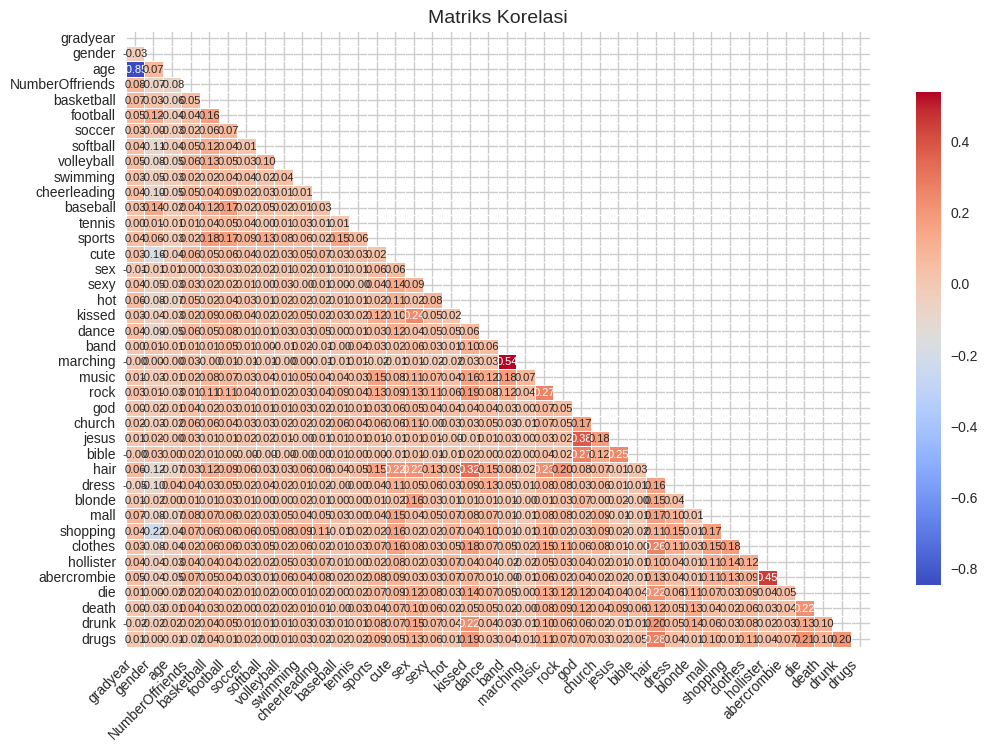

In [140]:
text7 = "4. Uji Korelasi pada Data Cleaned"
formatted_text = text7.center(100, "=")
print("\n",formatted_text,"\n")
# Kalkulasi korelasi
korelasi = dataset.corr()

# Buat mask untuk menyembunyikan bagian bawah karena matriks simetris
mask = np.triu(np.ones_like(korelasi, dtype=bool))

# Plot heatmap dengan ukuran lebih besar
plt.figure(figsize=(12, 8))
sns.heatmap(korelasi, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, annot_kws={"size": 8}, cbar_kws={"shrink": 0.8})

plt.title("Matriks Korelasi", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

### 5.4 Standardisasi Data

In [141]:
text8 = "5. Normalisasi Data"
formatted_text = text8.center(100, "=")
print("\n",formatted_text,"\n")
scaler = MinMaxScaler()
X = scaler.fit_transform(dataset)
X_clean = pd.DataFrame(X, index=dataset.index, columns=dataset.columns)
print('Data sudah Dinormalisasi')
X = X_clean


 ========================================5. Normalisasi Data========================================= 

Data sudah Dinormalisasi


### 5.5 Eliminasi Outlier

In [142]:
# 5. Eliminasi Outlier Maksimal 5% dengan Isolation Forest : Pemilihan ini didasari pada kebaikan model Isolation Forest 
# dalam mengidentifikasi outlier secara simultan bukan parsial, sehingga relevan untuk analisis seperti clustering
def Eliminasi_Outlier(X, contamination):
    # Fungsi untuk mendeteksi outlier menggunakan Isolation Forest
    def detect_outliers_isolation_forest(X, contamination):
        iso_forest = IsolationForest(contamination=contamination, random_state=42)
        outliers = iso_forest.fit_predict(X)
        df = X.copy()
        df['Outlier'] = outliers == -1  # Tandai outlier
        return df

    # Fungsi untuk mengeliminasi outlier dari dataset
    def eliminate_outliers(df):
        # Menghapus baris yang merupakan outlier
        cleaned_df = df[~df['Outlier']].drop(columns=['Outlier'])
        return cleaned_df

    # Deteksi outlier pada dataset yang sudah distandardisasi
    outlier_df = detect_outliers_isolation_forest(X, contamination=contamination)

    # Eliminasi outlier berdasarkan deteksi
    cleaned_data_scaled = eliminate_outliers(outlier_df)

    # Menampilkan hasil
    print(f"Jumlah data sebelum eliminasi outlier: {len(X)}")
    print(f"Jumlah data setelah eliminasi outlier: {len(cleaned_data_scaled)}")
    
    return cleaned_data_scaled

X_cleaned = Eliminasi_Outlier(X, 0.1)

Jumlah data sebelum eliminasi outlier: 9587
Jumlah data setelah eliminasi outlier: 8628


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [143]:
X_1 = X_cleaned.copy()
X_2 = X_cleaned.copy()

kmean = KMeans()
ward = AgglomerativeClustering(linkage="ward")

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

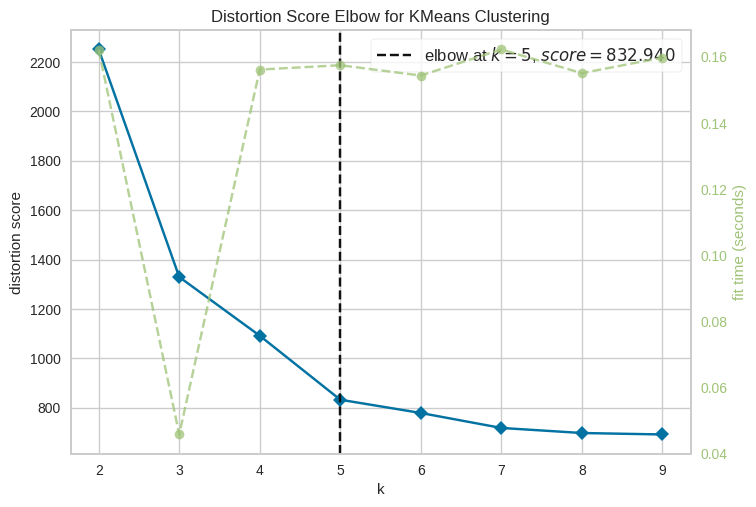

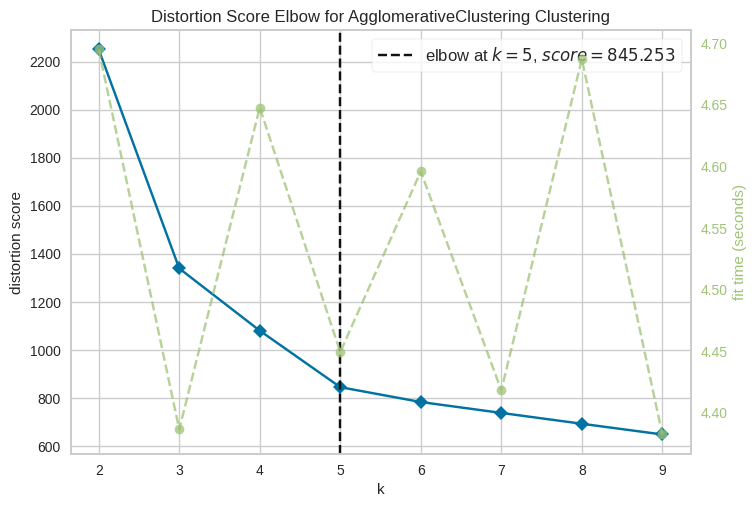

Jumlah cluster optimal untuk K-Means: 5
Jumlah cluster optimal untuk Ward Linkage: 5
Silhouette Score untuk K-Means: 0.4180
Silhouette Score untuk Ward Linkage: 0.3713


In [144]:
## K-Means (Elbow Method)
visualizer_km = KElbowVisualizer(kmean, k=(2, 10))
visualizer_km.fit(X_1)
visualizer_km.show()
optimal_km = visualizer_km.elbow_value_

## Hierarchical Clustering (Ward Linkage) - Menggunakan Elbow Method juga
visualizer_ward = KElbowVisualizer(ward, k=(2, 10))
visualizer_ward.fit(X_2)
visualizer_ward.show()
optimal_ward = visualizer_ward.elbow_value_

# K-Means
km = KMeans(n_clusters=optimal_km, random_state=42)
labels_km = km.fit_predict(X_1)

# Hierarchical Clustering (Ward Linkage)
ward = AgglomerativeClustering(n_clusters=optimal_ward, linkage="ward")
labels_ward = ward.fit_predict(X_2)

X_1['Cluster_KMeans'] = labels_km
X_2['Cluster_Ward'] = labels_ward

silhouette_km = silhouette_score(X_1.drop(columns=['Cluster_KMeans']), labels_km)
silhouette_ward = silhouette_score(X_2.drop(columns=['Cluster_Ward']), labels_ward)

print(f"Jumlah cluster optimal untuk K-Means: {optimal_km}")
print(f"Jumlah cluster optimal untuk Ward Linkage: {optimal_ward}")
print(f"Silhouette Score untuk K-Means: {silhouette_km:.4f}")
print(f"Silhouette Score untuk Ward Linkage: {silhouette_ward:.4f}")


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [145]:
# Menentukan jumlah fitur terbaik berdasarkan Mutual Information
num_features_km = min(5, X_1.shape[1] - 1)  # Maksimal 10 fitur atau sesuai dengan jumlah fitur yang tersedia
num_features_ward = min(5, X_2.shape[1] - 1)

# Feature Selection untuk K-Means
selector_km = SelectKBest(score_func=mutual_info_classif, k=num_features_km)
X_1_selected = selector_km.fit_transform(X_1.drop(columns=['Cluster_KMeans']), labels_km)
selected_features_km = X_1.drop(columns=['Cluster_KMeans']).columns[selector_km.get_support()]

# Feature Selection untuk Ward Linkage
selector_ward = SelectKBest(score_func=mutual_info_classif, k=num_features_ward)
X_2_selected = selector_ward.fit_transform(X_2.drop(columns=['Cluster_Ward']), labels_ward)
selected_features_ward = X_2.drop(columns=['Cluster_Ward']).columns[selector_ward.get_support()]

visualizer_km.fit(X_1_selected)
visualizer_ward.fit(X_2_selected)
optimal_km = visualizer_km.elbow_value_
optimal_ward = visualizer_ward.elbow_value_

# PCA untuk K-Means dan Ward Linkage
pca_km = PCA(n_components=num_features_km)
X_1_pca = pca_km.fit_transform(X_1.drop(columns=['Cluster_KMeans']))

pca_ward = PCA(n_components=num_features_ward)
X_2_pca = pca_ward.fit_transform(X_2.drop(columns=['Cluster_Ward']))

# Feature Selection berdasarkan VIF > 10
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Menghapus fitur dengan VIF > 10
X_1_vif = X_1.drop(columns=['Cluster_KMeans'])
vif_km = calculate_vif(X_1_vif)
selected_features_km_vif = vif_km[vif_km["VIF"] <= 10]["feature"].tolist()
X_1_vif_selected = X_1_vif[selected_features_km_vif]

X_2_vif = X_2.drop(columns=['Cluster_Ward'])
vif_ward = calculate_vif(X_2_vif)
selected_features_ward_vif = vif_ward[vif_ward["VIF"] <= 10]["feature"].tolist()
X_2_vif_selected = X_2_vif[selected_features_ward_vif]

# K-Means setelah Feature Selection
km_selected = KMeans(n_clusters=optimal_km, random_state=42)
labels_km_selected = km_selected.fit_predict(X_1_selected)
silhouette_km_selected = silhouette_score(X_1_selected, labels_km_selected)

# Ward Linkage setelah Feature Selection
ward_selected = AgglomerativeClustering(n_clusters=optimal_ward, linkage="ward")
labels_ward_selected = ward_selected.fit_predict(X_2_selected)
silhouette_ward_selected = silhouette_score(X_2_selected, labels_ward_selected)

# K-Means setelah PCA
labels_km_pca = km_selected.fit_predict(X_1_pca)
silhouette_km_pca = silhouette_score(X_1_pca, labels_km_pca)

# Ward Linkage setelah PCA
labels_ward_pca = ward_selected.fit_predict(X_2_pca)
silhouette_ward_pca = silhouette_score(X_2_pca, labels_ward_pca)

# K-Means setelah VIF
labels_km_vif = km_selected.fit_predict(X_1_vif_selected)
silhouette_km_vif = silhouette_score(X_1_vif_selected, labels_km_vif)

# Ward Linkage setelah VIF
labels_ward_vif = ward_selected.fit_predict(X_2_vif_selected)
silhouette_ward_vif = silhouette_score(X_2_vif_selected, labels_ward_vif)

# Membuat DataFrame untuk membandingkan sebelum dan sesudah Feature Selection serta PCA dan VIF
comparison_df = pd.DataFrame({
    'Metode': ['K-Means', 'Ward Linkage'],
    'Jumlah Fitur Sebelum': [X_1.shape[1] - 1, X_2.shape[1] - 1],
    'Jumlah Fitur Sesudah (Mutual Info)': [num_features_km, num_features_ward],
    'Fitur Terpilih (Mutual Info)': [', '.join(selected_features_km), ', '.join(selected_features_ward)],
    'Jumlah Fitur Sesudah (VIF)': [len(selected_features_km_vif), len(selected_features_ward_vif)],
    'Fitur Terpilih (VIF)': [', '.join(selected_features_km_vif), ', '.join(selected_features_ward_vif)],
    'Silhouette Sebelum': [silhouette_km, silhouette_ward],
    'Silhouette Sesudah (Mutual Info)': [silhouette_km_selected, silhouette_ward_selected],
    'Silhouette Sesudah (PCA)': [silhouette_km_pca, silhouette_ward_pca],
    'Silhouette Sesudah (VIF)': [silhouette_km_vif, silhouette_ward_vif]
})

comparison_df



,Metode,Jumlah Fitur Sebelum,Jumlah Fitur Sesudah (Mutual Info),Fitur Terpilih (Mutual Info),Jumlah Fitur Sesudah (VIF),Fitur Terpilih (VIF),Silhouette Sebelum,Silhouette Sesudah (Mutual Info),Silhouette Sesudah (PCA),Silhouette Sesudah (VIF)
0,K-Means,40,5,"gradyear, gender, age, cute, shopping",40,"gradyear, gender, age, NumberOffriends, basket...",0.417974,0.553000,0.545214,0.428782
1,Ward Linkage,40,5,"gradyear, gender, age, cute, shopping",40,"gradyear, gender, age, NumberOffriends, basket...",0.371272,0.585403,0.561016,0.371272


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [146]:
# Menentukan metode dan feature selection terbaik
best_method = comparison_df.loc[comparison_df['Silhouette Sesudah (Mutual Info)'].idxmax(), 'Metode']
best_feature_selection = 'Mutual Info'
print("Metode Terbaik adalah ",best_method)

# Membuat DataFrame final hanya dengan fitur yang terpilih dan kolom cluster
if best_method == 'K-Means':
    final_features = selected_features_km
    final_clusters = labels_km_selected
    final_df = X_1[final_features].copy()
    final_df['Cluster'] = final_clusters
else:
    final_features = selected_features_ward
    final_clusters = labels_ward_selected
    final_df = X_2[final_features].copy()
    final_df['Cluster'] = final_clusters
    
# Menampilkan jumlah cluster optimal
num_clusters = len(set(final_clusters))
print(f"Jumlah cluster optimal: {num_clusters}")

# Menggunakan t-SNE untuk mereduksi ke 3 dimensi
tsne = TSNE(n_components=3, perplexity=30, random_state=42)
if best_method == 'K-Means':
    X_tsne = tsne.fit_transform(X_1_selected)
    hue_pilih = labels_km_selected
else:
    best_method = "Ward Linkage"
    X_tsne = tsne.fit_transform(X_2_selected)
    hue_pilih = labels_ward_selected

# # Buat DataFrame untuk Plotly
# df_tsne = pd.DataFrame(X_tsne, columns=['Komponen 1', 'Komponen 2', 'Komponen 3'])
# df_tsne['Cluster'] = hue_pilih

# # Visualisasi dengan Plotly
# fig = px.scatter_3d(df_tsne, x='Komponen 1', y='Komponen 2', z='Komponen 3', 
#                      color=df_tsne['Cluster'].astype(str), 
#                      title=f'{best_method} Clustering (t-SNE 3D Visualization)',
#                      opacity=0.7)

# fig.show()




Metode Terbaik adalah  Ward Linkage
Jumlah cluster optimal: 5


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [147]:
import pandas as pd

# Inverse transform hanya untuk fitur yang ada di final_df
selected_features = final_df.columns[:-1]  # Mengambil hanya fitur yang dipilih
scaler_selected = scaler
scaler_selected.min_, scaler_selected.scale_ = scaler.min_[dataset.columns.get_indexer(selected_features)], scaler.scale_[dataset.columns.get_indexer(selected_features)]
final_df.iloc[:, :-1] = scaler_selected.inverse_transform(final_df.iloc[:, :-1])

# Mengubah kode cluster agar dimulai dari 1
final_df['Cluster'] = final_df['Cluster'] + 1

# Menghitung statistik untuk setiap cluster
cluster_mean = final_df.groupby('Cluster').mean().drop(columns=['gender'], errors='ignore').T
cluster_min = final_df.groupby('Cluster').min().drop(columns=['gender'], errors='ignore').T
cluster_max = final_df.groupby('Cluster').max().drop(columns=['gender'], errors='ignore').T

# Menentukan modus untuk variabel gender
if 'gender' in final_df.columns:
    final_df['gender'] = final_df['gender'].map({0: 'Female', 1: 'Male'})
    cluster_mode = final_df.groupby('Cluster')['gender'].agg(lambda x: x.mode().iloc[0])
    cluster_mode = pd.DataFrame(cluster_mode).T
    cluster_mode.index = ['Mode']
    cluster_mode = cluster_mode.reset_index().rename(columns={'index': 'Statistic'})
    cluster_mode.insert(1, 'Variable', 'Gender')
else:
    cluster_mode = None

# Menggabungkan semua statistik
data_frames = [
    cluster_mean.reset_index().assign(Statistic='Mean').rename(columns={'index': 'Variable'}),
    cluster_min.reset_index().assign(Statistic='Min').rename(columns={'index': 'Variable'}),
    cluster_max.reset_index().assign(Statistic='Max').rename(columns={'index': 'Variable'})
]

if cluster_mode is not None:
    data_frames.append(cluster_mode)

cluster_profile = pd.concat(data_frames)
cluster_profile = cluster_profile[['Statistic', 'Variable'] + [col for col in cluster_profile.columns if col not in ['Statistic', 'Variable']]]

cluster_profile

Cluster,Statistic,Variable,1,2,3,4,5
0,Mean,gradyear,2007.775313,2007.222621,2006.179147,2006.204929,2008.256641
1,Mean,age,16.564127,17.003142,18.179952,18.252918,16.0
2,Mean,cute,0.062681,0.32316,0.311594,0.044099,0.312144
3,Mean,shopping,0.039537,0.386894,0.371981,0.04799,0.409393
0,Min,gradyear,2006.0,2006.0,2006.0,2006.0,2008.0
1,Min,age,16.0,16.0,18.0,18.0,16.0
2,Min,cute,0.0,0.0,0.0,0.0,0.0
3,Min,shopping,0.0,0.0,0.0,0.0,0.0
0,Max,gradyear,2009.0,2009.0,2007.0,2007.0,2009.0
1,Max,age,19.0,19.0,19.0,19.0,16.0


Berdasarkan cluster yang dihasilkan dengan metode Ward Linkage yang merupakan bagian dari Hierarchical Clustering, diperoleh bahwa pengelompokan minat remaja melalui media sosial cenderung dipengaruhi aspek terkait interest. 

### Cluster 1
Cluster 1 merupakan cluster yang didominasi siswa dengan **rata-rata tahun lulus 2007**. Siswa tertua di cluster ini lulus di tahun 2006 dan sisa termuda lulus di tahun 2009. Cluster ini cenderung heterogen dimana nilai rata-rata tahun lulusan cenderung berada di tengah-tengah dari minimum dan maksimum tahun lulusan yang ada. Siswa di cluster ini **rata-rata berada di usia 16-17 tahun**. Nilai tersebut cenderung mendekati usia termuda di cluster ini yaitu 16 tahun, sedangkan juga terdapat siswa berusia 19 tahun. Selain itu cluster ini didominasi siswa dengan gender **Laki-laki (Male)**. Hal ini menjadi penyebab bahwa interest siswa yang cukup rendah pada topik Cute dan Shopping, dimana interest tersebut cenderung tinggi untuk siswa perempuan dan rendah di siswa laki-laki.

### Cluster 2
Cluster 2 merupakan cluster yang didominasi siswa dengan **rata-rata tahun lulus 2007**. Siswa tertua di cluster ini lulus di tahun 2006 dan sisa termuda lulus di tahun 2009. Hal ini menunjukkan cluster ini cenderung berisi siswa pada tahun lulus mendekati nilai minimum. Siswa di cluster ini **rata-rata berada di usia 17 tahun**. Nilai tersebut cenderung mendekati usia termuda di cluster ini yaitu 16 tahun, sedangkan juga terdapat siswa berusia 19 tahun. Selain itu cluster ini didominasi siswa dengan gender **Perempuan (Female)**. Hal ini juga searah dengan interest siswa yang paling tinggi pada topik Cute dan cukup tinggi pada topik Shopping yang menjadi karakteristik siswa perempuan. 

### Cluster 3
Cluster 3 merupakan cluster yang didominasi siswa dengan **rata-rata tahun lulus 2006**. Siswa tertua di cluster ini lulus di tahun tersebut dan sisa termuda lulus di tahun 2007. Hal ini menunjukkan cluster ini cenderung berisi siswa pada tahun lulus seragam serta lebih senior dibanding cluster lainnya. Siswa di cluster ini **rata-rata berada di usia 18 tahun**. Nilai tersebut cenderung mendekati usia tertua di cluster ini yaitu 19 tahun, sedangkan juga terdapat siswa berusia 18 tahun. Selain itu cluster ini didominasi siswa dengan gender **Perempuan (Female)**. Hal ini juga searah dengan interest siswa yang cukup tinggi pada topik Cute dan Shopping yang menjadi karakteristik siswa perempuan. 

### Cluster 4
Cluster 4 merupakan cluster yang didominasi siswa dengan **rata-rata tahun lulus 2006**. Siswa tertua di cluster ini lulus di tahun 2006 dan sisa termuda lulus di tahun 2007. Cluster ini cenderung homogen dimana nilai rata-rata tahun lulusan cenderung berada di mendekati minimum tahun lulusan yang ada. Siswa di cluster ini **rata-rata berada di usia 18-19 tahun**. Nilai tersebut cenderung mendekati usia tertua di cluster ini yaitu 19 tahun, sedangkan juga terdapat siswa berusia 18 tahun. Selain itu cluster ini didominasi siswa dengan gender **Laki-laki(Male)**. Hal ini menjadi penyebab bahwa interest siswa yang cukup rendah pada topik Cute dan Shopping, dimana interest tersebut cenderung tinggi untuk siswa perempuan dan rendah di siswa laki-laki.

### Cluster 5
Cluster 5 merupakan cluster yang didominasi siswa rata-rata tahun lulus 2008. Siswa tertua di cluster ini lulus di tahun 2008 dan siswa termuda lulus di tahun 2009. Hal ini menunjukkan siswa cluster ini didominasi tahun lulusan yang lebih baru secara keseluruhan serta mendekati minimum untuk cluster. Siswa di cluster ini rata-rata berada di usia 16 tahun yang juga homogen. Cluster ini didominasi siswa Perempuan. Hal ini juga ditunjukkan pada ketertarikan siswa yang cenderung ke Shopping dan Cute. Hal tersebut menggambarkan karakteristik dominan di cluster ini. Cluster ini memiliki rata-rata serta nilai interest lebih tinggi dibanding cluster lainnya untuk topik Cute dan paling tinggi untuk topik Shopping.

*Secara keseluruh profilisasi cluster yang dibentuk cukup menggambarkan keheterogenitasan antar cluster yang ditandai pada aspek yang saling mempengaruhi. Berdasarkan hal tersebut dapat dikatakan bahwa cluster yang terbentuk sudah dalam mengelompokkan siswa berdasarkan minat mereka terkait beberapa aspek yang ditinjau dari sosial media.*


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [149]:
final_df.to_csv("Dataset_Inisiasi.csv")